# Mailstone_1

# Research Question

- Does household consume more when their wealth increases? 
- We are interested in the relationship between household wealth and private consumption. We expect to identify a positive relationship between consumption and wealth, using data for EU zone 20 countries, and Japan. 
- Our methodology is OLS regression, and we aim to compute Marginal Propensity to consume(MPC) and elasticity to represent the effect.

# 1 Import Data

## 1.1 EU 

In [1]:
 #Make sure to install ecbdata first
 #Run this line in terminal if not installed:
 #pip install ecbdata

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ecbdata import ecbdata
import os

# Move to project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current working directory: {os.getcwd()}")

# Define save directory
save_dir = os.path.join("src", "raw data")
os.makedirs(save_dir, exist_ok=True)

# Download ECB data
df = ecbdata.get_series('MNA.Q.Y.I9.W0.S1M.S1.D.P31._Z._Z._T.EUR.V.N')
df1 = ecbdata.get_series('DWA.Q.I9.S14.A.LE.NUN.HST.EUR.S.N')

# Save to CSV
df.to_csv(os.path.join(save_dir, "consumption.csv"))
df1.to_csv(os.path.join(save_dir, "housing_wealth.csv"))

print("EU Data downloaded successfully.")

Current working directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
EU Data downloaded successfully.


## 1.2 Japan

### 1.2.1 Resource

- **Consumption**: Household consumption expenditure (from Family Income and Expenditure Survey - 家計調査)
- **Housing Wealth**: Fixed assets (housing component) from National Accounts (SNA)
- **Stock Market Wealth**: Household financial assets (specifically "stocks") from National Accounts (SNA)
- **Income**: Compensation of employees from National Accounts (SNA)

### 1.2.2 Download Data
- Download household consumption data.

In [1]:
import os
import requests

# --- Move to project root ---
# This code ensures you are always at the project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Create directory if it doesn't exist ---
save_dir = "notebooks/data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# --- Define file path ---
save_path = os.path.join(save_dir, "household_consumption.xlsx")

# --- Download URL ---
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm1n_jp.xlsx"

# --- Download and Save ---
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'notebooks/data/raw data/japan/household_consumption.xlsx'.


- Download stock market wealth data.
- Download houseing wealth data.

In [2]:
import os
import requests

# --- Move to project root ---
# This code ensures you are always at the project root
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Create directory if it doesn't exist ---
save_dir = "notebooks/data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# --- Define file path ---
save_path = os.path.join(save_dir, "household_stock.xlsx")

# --- Download URL ---
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023si4_jp.xlsx"

# --- Download and Save ---
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

print(f"Download completed and saved as '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Download completed and saved as 'notebooks/data/raw data/japan/household_stock.xlsx'.


- Download income data (compensation of employees).

In [3]:
import os
import pandas as pd
import requests

# --- Move to project root ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Create directory if it doesn't exist ---
save_dir = "notebooks/data/raw data/japan"
os.makedirs(save_dir, exist_ok=True)

# --- Define file path ---
save_path = os.path.join(save_dir, "employment_income.xlsx")

# --- Download URL ---
url = "https://www.esri.cao.go.jp/jp/sna/data/data_list/kakuhou/files/2023/tables/2023ffm2_jp.xlsx"

# --- Download and Save ---
response = requests.get(url)
with open(save_path, 'wb') as f:
    f.write(response.content)

# --- Read back the file (optional step) ---
df = pd.read_excel(save_path)

# --- Re-save the file (optional, ensures formatting) ---
df.to_excel(save_path, index=False)

print(f"Employment income data downloaded and saved to '{save_path}'.")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Employment income data downloaded and saved to 'notebooks/data/raw data/japan/employment_income.xlsx'.


# 2 Manipulate the data

## 2.1 EU

In [6]:
#Manipulate to what we want
data = df[['TIME_PERIOD','OBS_VALUE','UNIT_MEASURE']].dropna()
data.head(2)
data = data.rename({'TIME_PERIOD' : 'date','OBS_VALUE':'consumption'},axis=1)
data.date = pd.PeriodIndex(data.date, freq='Q').to_timestamp()
data = data[(data['date'] >= '2009-01-01') & (data['date']<= '2024-07-01')]


data1= df1[['TIME_PERIOD','OBS_VALUE','UNIT_MEASURE']].dropna()
data1 = data1.rename({'TIME_PERIOD' : 'date','OBS_VALUE':'housing wealth'},axis=1)
data1.date = pd.PeriodIndex(data1.date, freq='Q').to_timestamp()
data1 = data1[(data1['date'] >= '2009-01-01') & (data1['date']<= '2024-07-01')]

## 2.2 Japan

- Manipulate household consumption data.

In [4]:
import os
import sys
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# --- Add 'src' to sys.path ---
sys.path.append("src")
from data_function.extract_household_consumption import extract_household_consumption

# --- Define paths ---
save_path = "notebooks/data/raw data/japan/household_consumption.xlsx"
processed_dir = "notebooks/data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_consumption.csv")

# --- Create directory if not exists ---
os.makedirs(os.path.dirname(save_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# --- Extract and save ---
consumption_data = extract_household_consumption(save_path)
consumption_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: notebooks/data/processing_data/japan/processed_household_consumption.csv


- Manipulate
  - stock market wealth data.
  - houseing wealth data.

In [5]:
import os
import sys
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# --- Add 'src' to sys.path ---
sys.path.append("src")
from data_function.extract_housing_and_stock import extract_housing_and_stock

# --- Define paths ---
file_path = "notebooks/data/raw data/japan/household_stock.xlsx"
processed_dir = "notebooks/data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_household_stock.csv")

# --- Create directories if not exist ---
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# --- Extract and save ---
processed_data = extract_housing_and_stock(file_path)
processed_data.to_csv(processed_path, index=False)

print(f"Processed data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed data saved to: notebooks/data/processing_data/japan/processed_household_stock.csv


- Manipulate income data (compensation of employees).

In [7]:
import os
import sys
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Working directory set to: {os.getcwd()}")

# --- Add 'src' to sys.path ---
sys.path.append("src")
from data_function.extract_employment_income import extract_employment_income

# --- Define paths ---
file_path = "notebooks/data/raw data/japan/employment_income.xlsx"
processed_dir = "notebooks/data/processing_data/japan/"
processed_path = os.path.join(processed_dir, "processed_employment_income.csv")

# --- Create directories if not exist ---
os.makedirs(os.path.dirname(file_path), exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# --- Extract and save ---
processed_employment_income = extract_employment_income(file_path)
processed_employment_income.to_csv(processed_path, index=False)

print(f"Processed employment income data saved to: {processed_path}")


Working directory set to: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Processed employment income data saved to: notebooks/data/processing_data/japan/processed_employment_income.csv


# 3 Merge the data and present it in figure

## 3.1 EU

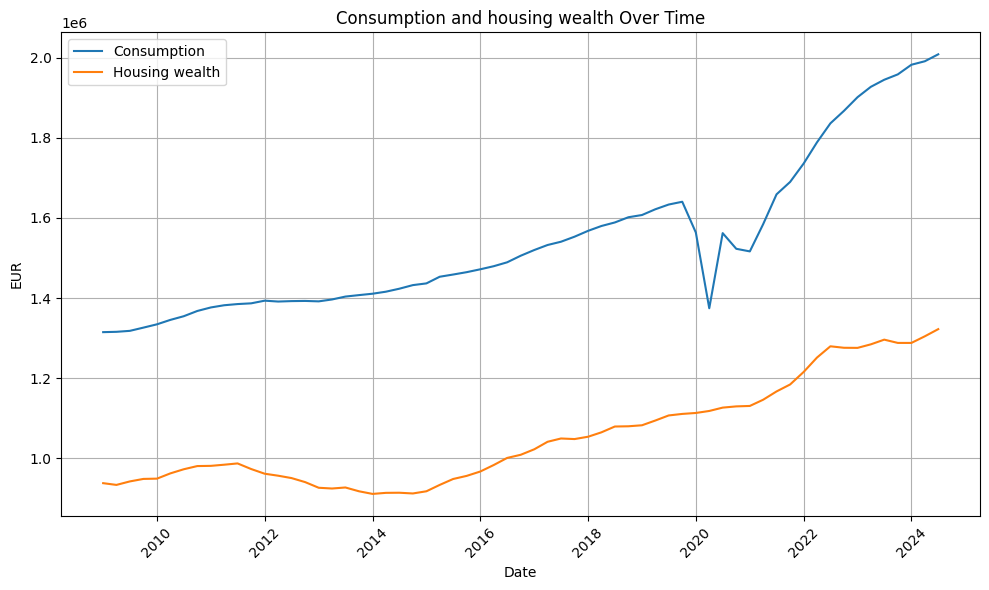

In [10]:
#Merge and present
df_merge = pd.merge(
    data, data1,
    
    how='inner', on =['date','UNIT_MEASURE']
    
)
df_merge.head(10)

plt.figure(figsize=(10, 6))
plt.plot(df_merge['date'], df_merge['consumption'], label='Consumption')
plt.plot(df_merge['date'], df_merge['housing wealth'], label='Housing wealth')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.title('Consumption and housing wealth Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.2 Japan

In [8]:
import os
import pandas as pd

# --- Move to project root safely ---
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# --- Define file paths ---
raw_path = "notebooks/data/processing_data/japan/"
clean_path = "notebooks/data/clean/"

csv_files = {
    "household_consumption": os.path.join(raw_path, "processed_household_consumption.csv"),
    "housing_stock_wealth": os.path.join(raw_path, "processed_household_stock.csv"),
    "employee_income": os.path.join(raw_path, "processed_employment_income.csv"),
}

# --- Read each dataset ---
consumption = pd.read_csv(csv_files["household_consumption"])
housing_stock = pd.read_csv(csv_files["housing_stock_wealth"])
employee_income = pd.read_csv(csv_files["employee_income"])

# --- Merge on 'year' ---
merged_data = consumption.merge(
    housing_stock, on="year", how="inner"
).merge(
    employee_income, on="year", how="inner"
)

# --- Check merged dataset ---
print(merged_data.head())
print(merged_data.columns)

# --- Round value columns ---
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns].round(0).astype(int)

# --- Create clean directory if not exists ---
os.makedirs(clean_path, exist_ok=True)

# --- Save merged data ---
merged_path = os.path.join(clean_path, "merged_macro_data.csv")
merged_data.to_csv(merged_path, index=False)

print(f"Merged dataset saved successfully at {merged_path}!")


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
   year  household_consumption  fixed_asset  stock_asset  employment_income
0  1994               266250.9     397066.4     130971.4           262822.6
1  1995               271381.7     399831.5     128776.7           267095.2
2  1996               278702.4     416861.5     118755.9           272962.4
3  1997               279745.5     423410.6      86465.8           279054.2
4  1998               278920.2     418589.8      80110.8           273370.2
Index(['year', 'household_consumption', 'fixed_asset', 'stock_asset',
       'employment_income'],
      dtype='object')
Merged dataset saved successfully at notebooks/data/clean/merged_macro_data.csv!


# 4 Descriptive Statistics

## 4.1 EU

In [ ]:
# Descriptive statistics
plt.figure()
plt.title('Consumption')
df_merge['consumption'].describe().drop(['count'],axis=0).plot(kind ='bar')
plt.figure()
plt.title('Housing wealth')
df_merge['housing wealth'].describe().drop(['count'],axis=0).plot(kind ='bar')


## 4.2 Japan

In [9]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import os

# Move to project root safely
while not os.path.isdir("notebooks"):
    os.chdir("..")
print(f"Current directory: {os.getcwd()}")

# Load merged data
merged_path = "notebooks/data/clean/merged_macro_data.csv"
merged_data = pd.read_csv(merged_path)
# Show descriptive statistics
print("Descriptive Statistics (Original Data):")
print(merged_data.describe())

# Convert values to billion yen (divide by 1000)
value_columns = ['household_consumption', 'fixed_asset', 'stock_asset', 'employment_income']
merged_data[value_columns] = merged_data[value_columns] / 1000

# Show descriptive statistics again after conversion
print("\nDescriptive Statistics (Converted to Billion Yen):")
print(merged_data.describe())


Current directory: /Users/Jared/Documents/GitHub/graspp-25S-Wealth-Consumption
Descriptive Statistics (Original Data):
              year  household_consumption    fixed_asset   stock_asset  \
count    30.000000              30.000000      30.000000      30.00000   
mean   2008.500000          286519.100000  410729.966667  143437.70000   
std       8.803408            9773.603498   13696.322105   48360.75906   
min    1994.000000          266251.000000  385535.000000   80111.00000   
25%    2001.250000          280426.750000  401289.750000  102274.25000   
50%    2008.500000          283809.500000  409338.000000  134562.50000   
75%    2015.750000          291108.250000  418097.250000  178615.50000   
max    2023.000000          314756.000000  443824.000000  250212.00000   

       employment_income  
count          30.000000  
mean       268422.100000  
std         13729.709079  
min        251155.000000  
25%        257151.000000  
50%        266433.500000  
75%        273625.000000 

# 5 Visualization

## 5.1 EU

## 5.2 Japan

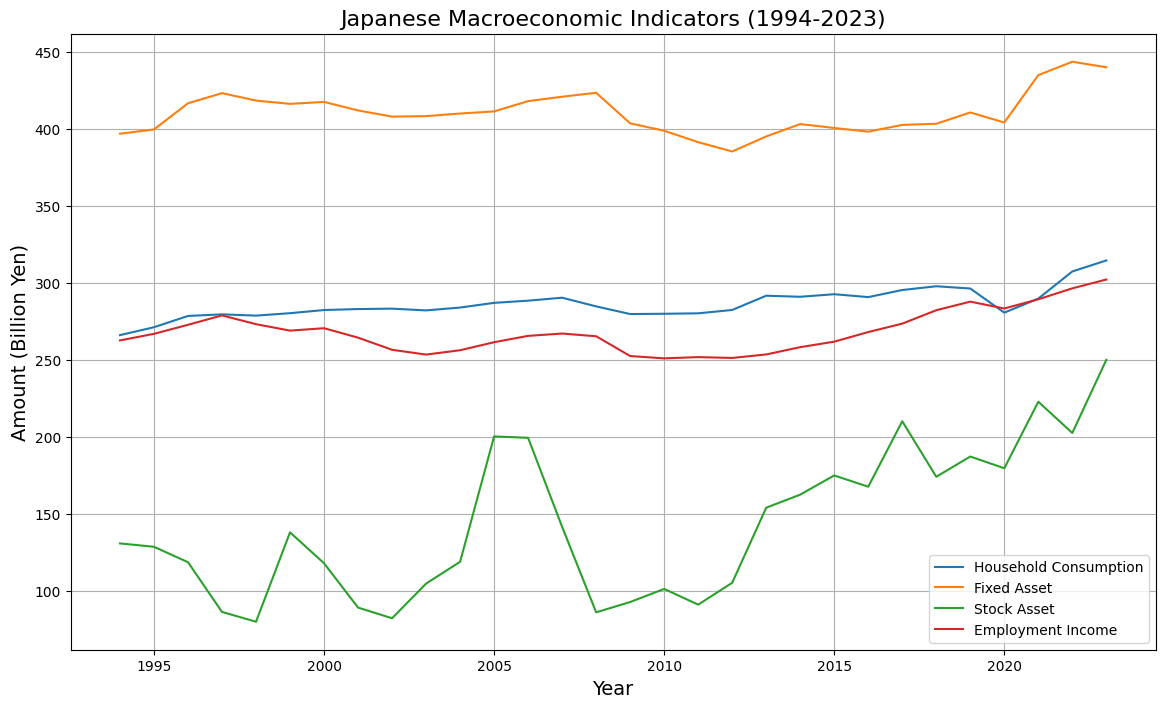

In [11]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot each variable
for column in value_columns:
    plt.plot(merged_data['year'], merged_data[column], label=column.replace('_', ' ').title())

# Title and labels
plt.title("Japanese Macroeconomic Indicators (1994-2023)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount (Billion Yen)", fontsize=14)
plt.legend()
plt.grid(True)

# Save the figure if needed
# plt.savefig("macro_data_trends.png", dpi=300)

plt.show()


# 6 Regression

## 6.1 EU

## 6.2 Japan

### 6.2.1 Modeling

Empirical Strategy

- Convert all series to:
  - **Real terms** (adjusted for inflation)
  - **Per capita** (divided by total population)

- Conduct a regression based on the following model:

$$
\log C_{t} = \alpha + \beta \log S_{t} + \gamma \log H_{t} + \phi \log Y_{t} + \epsilon_{t}
$$

- Where:

\begin{array}{ll}
C_{t} & : \text{Household consumption} \\
S_{t} & : \text{Stock market wealth} \\
H_{t} & : \text{Housing wealth} \\
Y_{t} & : \text{Compensation of employees}
\end{array}


Main Focus

- Estimate and compare:

\begin{array}{ll}
\gamma & : \text{Elasticity of consumption with respect to housing wealth} \\
\beta & : \text{Elasticity of consumption with respect to stock market wealth}
\end{array}


Goal

- Understand the relative importance of housing and stock market wealth in driving household consumption behavior in Japan.


 - Make values become log-transformed variables.

In [10]:
import numpy as np 

# Create log-transformed variables
merged_data["log_household_consumption"] = np.log(merged_data["household_consumption"])
merged_data["log_fixed_asset"] = np.log(merged_data["fixed_asset"])
merged_data["log_stock_asset"] = np.log(merged_data["stock_asset"])
merged_data["log_employment_income"] = np.log(merged_data["employment_income"])

# Check
print(merged_data[["log_household_consumption", "log_fixed_asset", "log_stock_asset", "log_employment_income"]].head())


   log_household_consumption  log_fixed_asset  log_stock_asset  \
0                   5.584439         5.984103         4.874976   
1                   5.603527         5.991044         4.858082   
2                   5.630143         6.032755         4.777071   
3                   5.633882         6.048343         4.459751   
4                   5.630925         6.036892         4.383413   

   log_employment_income  
0               5.571481  
1               5.587604  
2               5.609333  
3               5.631405  
4               5.610826  


### 6.2.2 OLS

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming 'data' is your DataFrame
# Prepare independent variables
X = merged_data[["log_fixed_asset", "log_stock_asset", "log_employment_income"]]
X = sm.add_constant(X)  # Adds a constant term (intercept)

# Prepare dependent variable
y = merged_data["log_household_consumption"]

# Run OLS regression
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   OLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     9.536
Date:                       Mon, 12 May 2025   Prob (F-statistic):           0.000202
Time:                               11:09:39   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

### → Findings from the Results

### Coefficient Interpretations

- **`log_stock_asset` (Stock Market Wealth)**
  - **Coefficient (β) = 0.0560**, **p-value = 0.003** → **Statistically significant at the 1% level**.
  - → **An increase in stock market wealth is strongly associated with higher household consumption**.

- **`log_fixed_asset` (presumably Housing Wealth)**
  - **Coefficient (γ) = 0.2938**, **p-value = 0.163** → **Not statistically significant (even at the 10% level)**.
  - → **The relationship between housing wealth and consumption appears weak and statistically insignificant**.

- **`log_employment_income` (Compensation of Employees)**
  - **Coefficient = 0.0207**, **p-value = 0.897** → **Highly insignificant**.
  - → **No detectable effect of employment income on consumption in this model**.

### Model Fit

- **R-squared = 0.524** → **Moderate explanatory power** (the model explains about 52% of the variation in household consumption).

### Cautions

- The **Condition Number is large (1850)**, which suggests **potential multicollinearity**.

---

### Summary (in brief)
- **Stock market wealth has a small but statistically significant positive effect on consumption.**
- **Housing wealth shows a larger coefficient but is not statistically significant.**
- **Employment income appears irrelevant for consumption dynamics in this model.**
- **Maybe multicollinearity issues occurs.**


### 6.2.3 Other Regression

#### 6.2.3.1 Robust OLS

In [14]:
import statsmodels.api as sm

# Add constant term
X = sm.add_constant(X)

# Fit OLS with robust standard errors (HC3 type)
robust_ols_model = sm.OLS(y, X).fit(cov_type='HC3')

# Show summary
print(robust_ols_model.summary())

                                OLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   OLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     7.351
Date:                       Mon, 12 May 2025   Prob (F-statistic):            0.00101
Time:                               11:09:43   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                         HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

#### 6.2.3.2 GLS (Generalized Least Squares)

In [15]:
# Fit Generalized Least Squares (assumes known structure of heteroscedasticity or correlation)
gls_model = sm.GLS(y, X).fit()

# Show summary
print(gls_model.summary())

                                GLS Regression Results                               
Dep. Variable:     log_household_consumption   R-squared:                       0.524
Model:                                   GLS   Adj. R-squared:                  0.469
Method:                        Least Squares   F-statistic:                     9.536
Date:                       Mon, 12 May 2025   Prob (F-statistic):           0.000202
Time:                               11:09:45   Log-Likelihood:                 70.763
No. Observations:                         30   AIC:                            -133.5
Df Residuals:                             26   BIC:                            -127.9
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

#### 6.2.3.3 GLM (Generalized Linear Model)

In [16]:
# Fit Generalized Linear Model with Gaussian family (similar to OLS)
glm_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Show summary
print(glm_model.summary())


                     Generalized Linear Model Regression Results                     
Dep. Variable:     log_household_consumption   No. Observations:                   30
Model:                                   GLM   Df Residuals:                       26
Model Family:                       Gaussian   Df Model:                            3
Link Function:                      Identity   Scale:                      0.00060377
Method:                                 IRLS   Log-Likelihood:                 70.763
Date:                       Mon, 12 May 2025   Deviance:                     0.015698
Time:                               11:09:47   Pearson chi2:                   0.0157
No. Iterations:                            3   Pseudo R-squ. (CS):             0.6184
Covariance Type:                   nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

## Summary of Findings (Based on GLM Results)

### Research Question 1:
**How does the elasticity of consumption with respect to different types of household wealth differ?**
- Stock market wealth has a **significant positive effect** on consumption.
- Housing wealth appears more elastic but **is not statistically significant**.
- Income shows **no explanatory power** in this specification.

### Research Question 2:
**What are the differences in elasticity between housing and stock market wealth in Japan?**

- The **elasticity of housing wealth (0.29)** is higher than that of stock market wealth (0.056).
- However, only the effect of **stock market wealth is statistically significant**.
- Conclusion: **Only stock market wealth can be confirmed to influence consumption reliably** in this model.

### Remaining Issues

1. **Statistical insignificance of housing wealth**  
   → May require more data or alternative modeling techniques.

2. **No checks for time series assumptions**  
   → Stationarity (ADF test) and autocorrelation (Durbin-Watson) still need to be verified.